# Face Detection
- haarcascade
-


### openCV
1. Loading the image


In [1]:
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/people1.jpg')

In [32]:
image.shape

(1280, 1920, 3)

In [6]:
# opencv 기능
# cv2.imshow(image)

# colab 이미지 show
from google.colab.patches import cv2_imshow
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

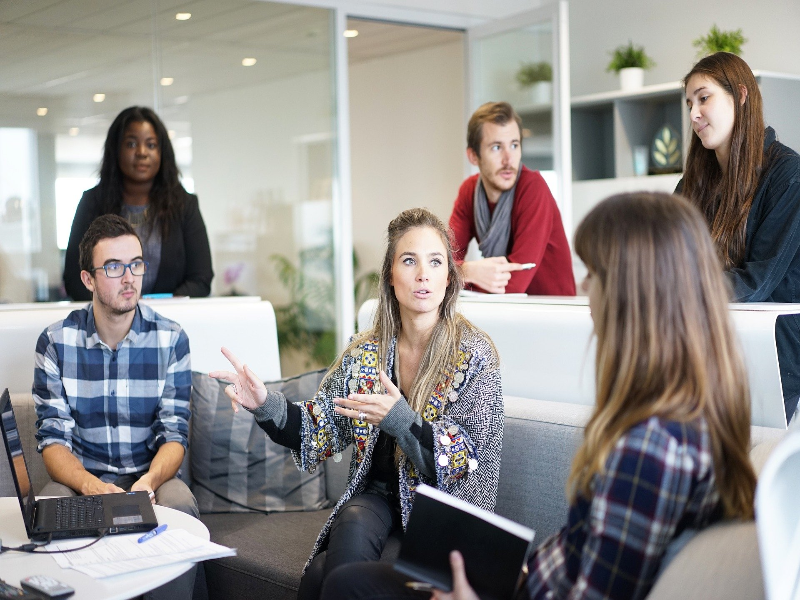

In [33]:
# 이미지 크기 변경
image = cv2.resize(image,(800, 600))
cv2_imshow(image)

## haarcascade란? <br>
얼굴의 특징을 설명하는 Haar-like 특징을 사용하여 객체를 감지한다. 각 Hear-like 특징은 흑과 백의 직사각형 영역으로 구성되며, 이특징의 조합으로 객체를 식별한다. <br>
학습 단계에선 얼굴을 포함하는 긍정 이미지와 얼굴이 없는 부정 이미지를 사용하여 분류기를 학습한다. 이때 AdaBoost알고리즘으로 약한 분류기와 강력한 분류기로 결합한다. 그리고 학습된 모델은 Cascade(계단식)으로 구성되어 다양한 스케일에서 효과적으로 객체를 검출 할 수 있도록 설계된다. 빠른 속도로 객체를 감지 할 수 있다는 장점이 있다
<br>
\* 흑백사진을 선호,실시간 얼굴 감지 가능, 안면 인식등

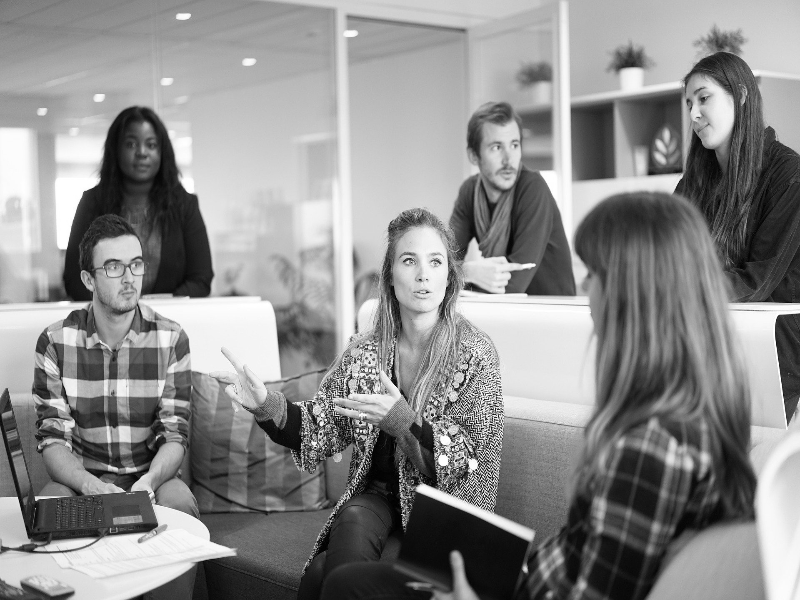

(600, 800)


In [34]:
# RGB 채널 컬러 이미지 -> 흑백 채널 이미지
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)
print(image_gray.shape)

In [17]:
# Detecting faces

# Cascade 함수호출(기존 학습된 모델 사용)
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Cascades/haarcascade_frontalface_default.xml')

In [35]:
# 감지
detections = face_detector.detectMultiScale(image_gray)
# 감지된 부분을 2차원 배열로 출력
# [x좌표, y좌표, weight, height]
print(detections)

[[677  72  68  68]
 [115 124  53  53]
 [475 123  59  59]
 [387 233  73  73]
 [ 92 239  66  66]
 [390 323  56  56]]


677 72 68 68
115 124 53 53
475 123 59 59
387 233 73 73
92 239 66 66
390 323 56 56


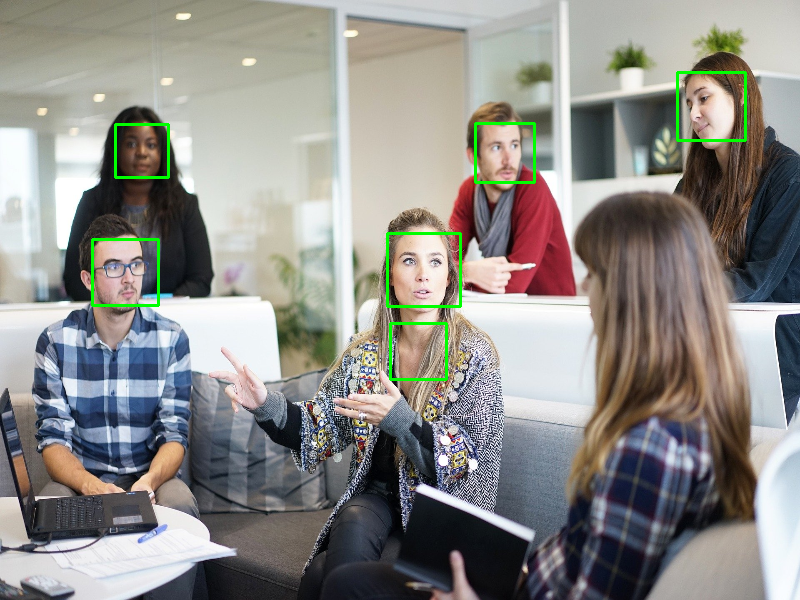

In [36]:
for (x,y,w,h) in detections:
  print(x,y,w,h)
  # rectangle(image_src, 사각형 시작위치, 사각형 종료위치, 색깔, border 굵기)
  cv2.rectangle(image, (x,y),(x+w,y+h), (0,255,0),2)
cv2_imshow(image)

### haarcascade parameters 조정
- **scaleFactor**<br>
  - 이미지를 얼마나 축소하여 검사할지를 결정하는 매개변수이다. 이 값은 1보다 큰 수로, 이미지를 반복해서 검사할 때의 스케일 간격을 지정한다. 작은 값은 더 많은 스케일을 사용하여 객체를 검출하게 하지만, 계산 비용이 증가하게 됩니다.<br>
  - 기본값 :1.1
  - 예시 : <br>
   - `scaleFactor=1.1`은 이미지를 1.1배씩 축소하여 검사 검사합니다.
- **minNeighbors**
  - 이미지에서 최종경계상자를 정할때 알고리즘 내부에선 여러개의 후보 경계상자를 감지하고 그중 최고의 경계상자를 최종 경계상자로 설정한다 이때 후보 경계상자의 개수가 minNeighbors값보다 적은 감지된 부분은 감지에서 제외시킨다.
  - 기본값:3
- **minSize**
  - 최종경계상자의 크기가 minSize를 넘기지 못하면 감지 대상에서 제외한다
  - 기본값:(30,30)
- **maxSize**
  - 최종경계상자의 크기가 maxSize를 넘긴다면 감지 대상에서 제외한다
  - 기본값: 제한 없음(None)


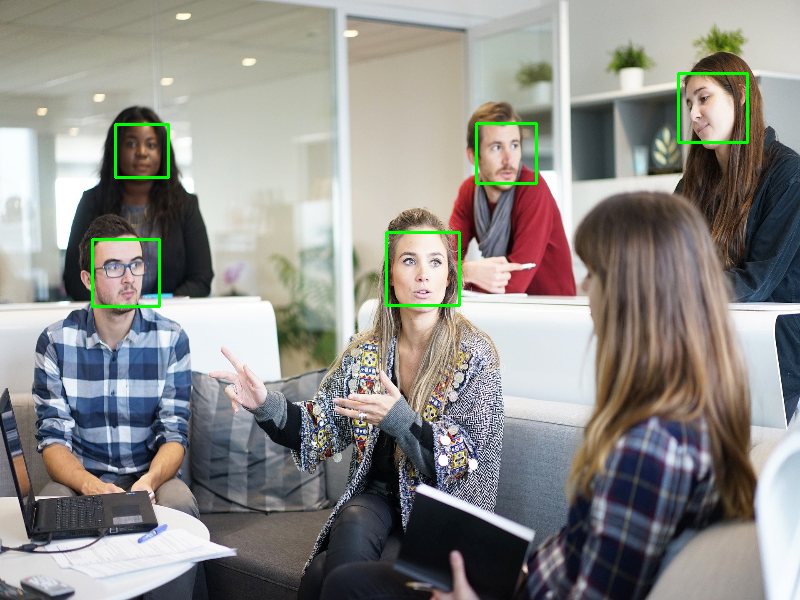

In [68]:
# scaleFactor
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/people1.jpg')
image = cv2.resize(image,(800, 600))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 얼굴 감지
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.15)
for (x,y,w,h) in detections:
  #print(x,y,w,h)
  # rectangle(image_src, 사각형 시작위치, 사각형 종료위치, 색깔, border 굵기)
  cv2.rectangle(image, (x,y),(x+w,y+h), (0,255,0),2)
cv2_imshow(image)

(537, 1023, 3)


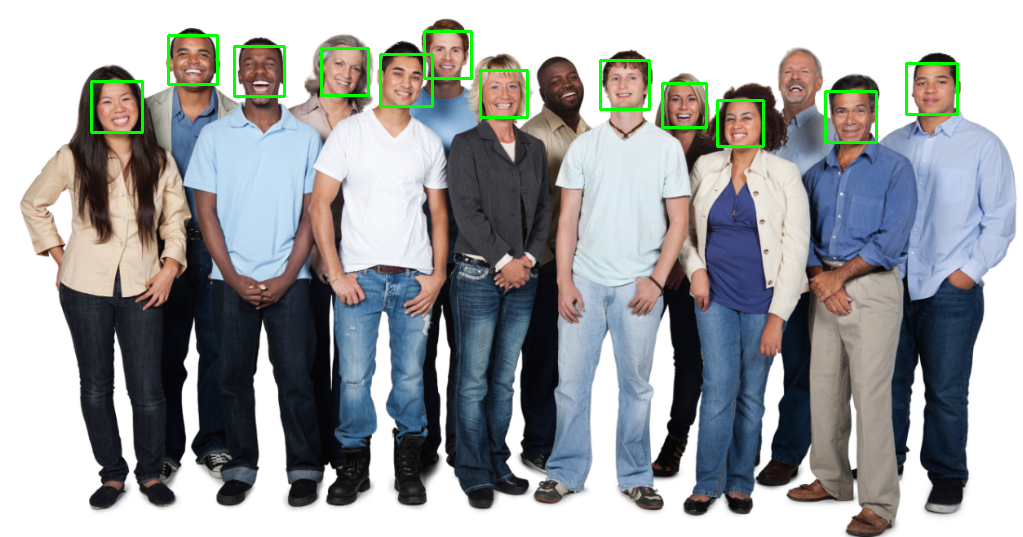

In [133]:
#minNeighbors,minSize,maxSize
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/people2.jpg')
#이미지가 작기때문에 reshape 하지 않는다.
print(image.shape)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 얼굴 감지
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.2, minNeighbors=7, minSize=(20,20), maxSize=(100,100))
for (x,y,w,h) in detections:
  #print(x,y,w,h)
  # rectangle(image_src, 사각형 시작위치, 사각형 종료위치, 색깔, border 굵기)
  cv2.rectangle(image, (x,y),(x+w,y+h), (0,255,0),2)
cv2_imshow(image)

### **아무리 매개변수를 설정해도 모든 감지가 정확하게 이루어지지 않을 경우도 있다.**

### Haar Casecade - Eye detection


In [ ]:
# 눈 검출 분류기
eye_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Cascades/haarcascade_eye.xml')

In [ ]:
# scaleFactor
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Images/people1.jpg')
image = cv2.resize(image,(800, 600))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 얼굴 감지
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.15)
for (x,y,w,h) in detections:
  #print(x,y,w,h)
  # rectangle(image_src, 사각형 시작위치, 사각형 종료위치, 색깔, border 굵기)
  cv2.rectangle(image, (x,y),(x+w,y+h), (0,255,0),2)
cv2_imshow(image)